### coding self attention mechanism
#### 2.self attention with trainable weights (gpt uses this mechanism)

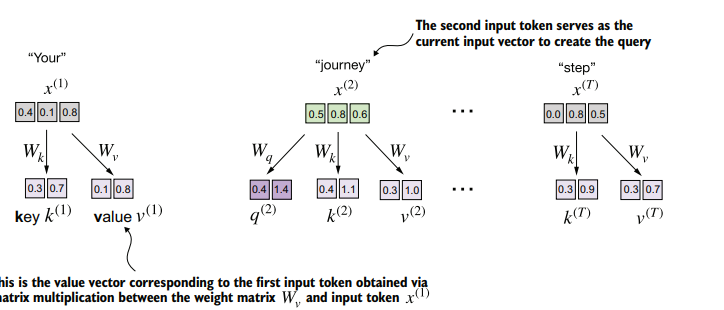

steps to do so-
- introduce three new weights(Wq, Wk, Wv)
- compute query, key and value vectors
- calculate attetnion scores
- calculate normalised attetnion score
- calculate context vector (z)

In [2]:
import torch

#very small embedding with 3 dim vectors
inputs= torch.tensor(
    [[0.42, 0.13, 0.81], #x1
    [0.55, 0.87, 0.66],  #x2   
    [0.22, 0.58, 0.33],  #x3   
    [0.54, 0.85, 0.64],  #x4
    [0.77, 0.25, 0.10],  #x5
    [0.05, 0.80, 0.55]]  #x6
)

In [3]:
x_2 = inputs[1] # second input element
d_in = inputs.shape[1] # the input embedding size, d=3
d_out = 2 # the output embedding size, d=2

In [4]:
torch.manual_seed(123)

#initialize three new weights
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [5]:
#step 2- compute q,k and v vector

query_2 = x_2 @ W_query # wrt to the 2nd input element
key_2 = x_2 @ W_key 
value_2 = x_2 @ W_value

print(query_2)

tensor([0.4306, 1.4551])


In [6]:
keys = inputs @ W_key 
values = inputs @ W_value

print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [11]:
#step 3- calculate attention scores

# keys_2 = keys[1]
# attn_score3 = query_2.dot(keys_2)
# print(attn_score3)   # tensor(1.8524)

attn_score3 = query_2 @ keys.T # All attention scores for given query
print(attn_score3)


tensor([1.1548, 1.8524, 1.0795, 1.8049, 0.5577, 1.5440])


In [ ]:
#step 4-compute attention weights(normalised attention scores)

d_k = keys.shape[1]
attn_weights_3 = torch.softmax(attn_score3/ d_k**0.5, dim=-1)
print(attn_weights_3)

tensor([0.1400, 0.2293, 0.1328, 0.2217, 0.0918, 0.1844])


In [13]:
#step 5-computing context vector

context_vec_3 = attn_weights_3 @ values
print(context_vec_3)

tensor([0.3046, 0.8082])
